In [7]:
import cv2
import numpy as np
from scipy.ndimage import convolve
import matplotlib.pyplot as plt

## Separated Convolution of RGB images
When dealing with RGB images, each pixel contains three values: one for red (R), one for green (G) and one for blue (B). Therefore, an RGB image can be thought of as having three channels.
 
### Convolution of RGB images
1. **Channel-wise convolution**: To appy convolution to an RGB image, we perform the convolution separately on each channel.This is appy the kernel to each channel independently and obtaining three separate output matrics, one for each channel.
2. **Combining the channels**: After performing the convolution on each channel, the results are combined back into a three-channel image.   

Steps for an algorithm:
1. Split the RGB image into tree channels: R, G, B.
2. Apply the same convoultion kernel (2D) to each channel.
3. Combine the three convolved channels back into an RGB image.

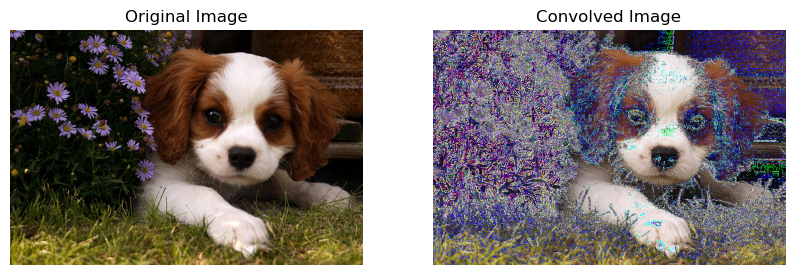

In [15]:
# Define a kernel
kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

image_path = "images/dog.jpg"

def rgb_convolution(path, kernel_2d):
    
    # import the image
    image = cv2.imread(path)
    
    # convert from bgr to rgb
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # separate the channels
    R, G, B = cv2.split(image_rgb)
    
    # convolve each channel
    R_c = convolve(R, kernel_2d)
    G_c = convolve(G, kernel_2d)
    B_c = convolve(B, kernel_2d)
    
    # combine the convolved channels
    convolved_image = np.stack((R_c, G_c, B_c), axis=-1)
    
    # Clip the values to be between 0 and 255 (valid RGB range)
    convolved_image = np.clip(convolved_image, 0, 255).astype(np.uint8)
    
    # Show the original and convolved images using matplotlib
    plt.figure(figsize=(10, 5))
    
    # Original Image
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image_rgb)
    plt.axis('off')
    
    # Convolved Image
    plt.subplot(1, 2, 2)
    plt.title("Convolved Image")
    plt.imshow(convolved_image)
    plt.axis('off')
    
    plt.show()
    

rgb_convolution(image_path, kernel)

RGB convolution using PyTorch

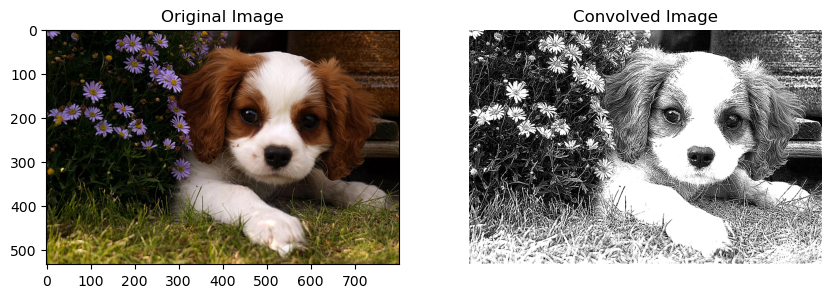

In [21]:
import torch
import torch.nn as nn
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt

# Load the RGB image using PIL
image_path = "images/dog.jpg"  # Replace with the path to your image
image = Image.open(image_path)

# Convert the image to a tensor and normalize the pixel values to [0, 1]
transform = T.Compose([
    T.ToTensor()            # Convert the image to a PyTorch tensor
])

# Apply the transformations and add batch dimension (1, C, H, W)
image_tensor = transform(image).unsqueeze(0)  # Shape: (1, 3, 256, 256)

# Define a convolutional layer with a custom kernel for RGB
class RGBConvolution(nn.Module):
    def __init__(self):
        super(RGBConvolution, self).__init__()
        
        # Define a 3x3 kernel with 3 input channels (for RGB) and 3 output channels
        self.conv = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, padding=1, bias=False)
        
        # Manually set the kernel weights (you can customize this)
        custom_kernel = torch.tensor([[
            [[0, -1, 0], [-1, 5, -1], [0, -1, 0]],  # For Red channel
            [[0, -1, 0], [-1, 5, -1], [0, -1, 0]],   # For Green channel
            [[0, -1, 0], [-1, 5, -1], [0, -1, 0]]  # For Blue channel
        ]]).float()  # Convert the kernel to float

        # Expand kernel weights to match the shape (out_channels, in_channels, kernel_height, kernel_width)
        self.conv.weight.data = custom_kernel.repeat(3, 1, 1, 1)  # Apply same kernel for each output channel

    def forward(self, x):
        return self.conv(x)

# Initialize the convolutional layer
model = RGBConvolution()

# Perform the convolution
convolved_image = model(image_tensor)

# Convert the convolved output tensor to numpy for visualization
convolved_image_np = convolved_image.squeeze().detach().permute(1, 2, 0).numpy()

# Clip the values to be between 0 and 1 (valid range for floating-point RGB images)
convolved_image_np = np.clip(convolved_image_np, 0, 1)

# Display the original and convolved images using matplotlib
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)

# Convolved Image
plt.subplot(1, 2, 2)
plt.title("Convolved Image")
plt.imshow(convolved_image_np)
plt.axis('off')

plt.show()

In [ ]:
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]